---
title: "Homework 4 - Part 1: Lasso Linear Regerssion - Model 2"
subtitle: Beer Markets with Big Demographic Design
date: 2025-04-19
from: markdown+emoji
execute: 
  eval: false
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale # zero mean & one s.d.
from sklearn.linear_model import LassoCV, lasso_path
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#beer = pd.read_csv("https://bcdanl.github.io/data/beer_markets_xbeer_xdemog.zip")
beer = pd.read_csv("https://bcdanl.github.io/data/beer_markets_xbeer_brand_xdemog.zip")
#beer = pd.read_csv("https://bcdanl.github.io/data/beer_markets_xbeer_brand_promo_xdemog.zip")

In [3]:
X = beer.drop('ylogprice', axis = 1)
y = beer['ylogprice']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.values
y_test = y_test.values

In [5]:
# LassoCV with a range of alpha values
lasso_cv = LassoCV(n_alphas = 100,
                   alphas = None, # alphas=None automatically generate 100 candidate alpha values
                   cv = 5,
                   random_state=42,
                   max_iter=100000)

In [6]:
lasso_cv.fit(X_train.values, y_train)
#lasso_cv.fit(X_train.values, y_train.ravel())
print("LassoCV - Best alpha:", lasso_cv.alpha_)


LassoCV - Best alpha: 0.00022539867869301466


In [7]:
# Create a DataFrame including the intercept and the coefficients:
coef_lasso_beer = pd.DataFrame({
    'predictor': list(X_train.columns),
    'coefficient':  list(lasso_cv.coef_),
    'exp_coefficient': np.exp(  list(lasso_cv.coef_) )
})


# Evaluate
y_pred_lasso = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("LassoCV - MSE:", mse_lasso)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


LassoCV - MSE: 0.028972019742897575


In [8]:
coef_lasso_beer_n0 = coef_lasso_beer[coef_lasso_beer['coefficient'] != 0]

In [9]:
X_train.shape[1]

2645

In [10]:
coef_lasso_beer_n0.shape[0]

160

In [11]:
coef_lasso_beer_n0

,predictor,coefficient,exp_coefficient
0,logquantity,-0.140849,0.868621
1,container_CAN,-0.054905,0.946575
2,brandBUSCH_LIGHT,-0.085638,0.917927
4,brandMILLER_LITE,0.000932,1.000932
5,brandNATURAL_LIGHT,-0.474588,0.622141
...,...,...,...
2362,marketRURAL_WEST_VIRGINIA:npeople2,-0.030961,0.969513
2375,marketTAMPA:npeople2,0.018641,1.018816
2376,marketURBAN_NY:npeople2,0.008943,1.008983
2416,marketRALEIGH-DURHAM:npeople3,-0.005085,0.994928


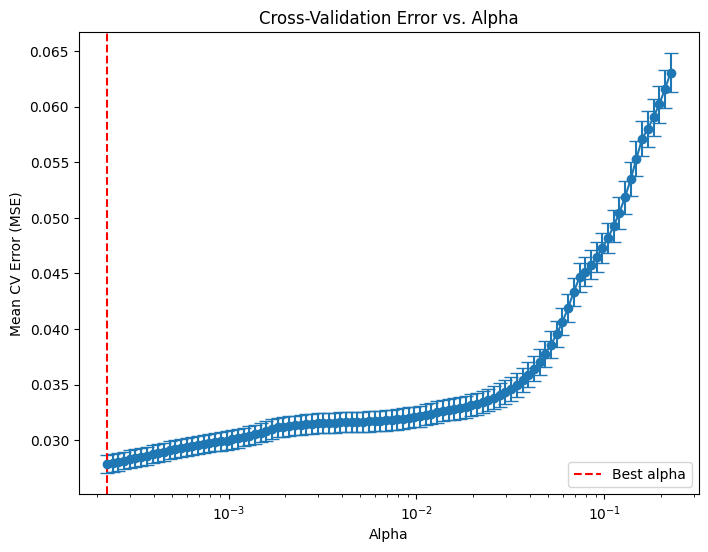

In [12]:
# Compute the mean and standard deviation of the CV errors for each alpha.
mean_cv_errors = np.mean(lasso_cv.mse_path_, axis=1)
std_cv_errors = np.std(lasso_cv.mse_path_, axis=1)

plt.figure(figsize=(8, 6))
plt.errorbar(lasso_cv.alphas_, mean_cv_errors, yerr=std_cv_errors, marker='o', linestyle='-', capsize=5)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean CV Error (MSE)')
plt.title('Cross-Validation Error vs. Alpha')
#plt.gca().invert_xaxis()  # Optionally invert the x-axis so lower alphas (less regularization) appear to the right.
plt.axvline(x=lasso_cv.alpha_, color='red', linestyle='--', label='Best alpha')
plt.legend()
plt.show()

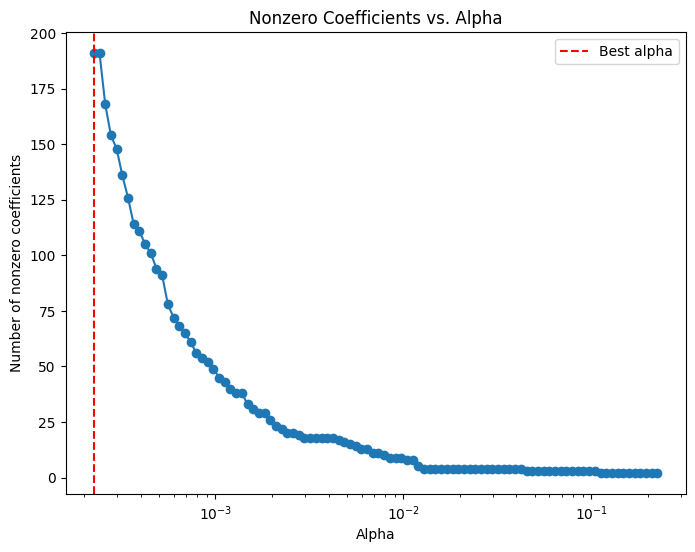

In [13]:
# Compute the coefficient path over the alpha grid that LassoCV used
alphas, coefs, _ = lasso_path(X_train, y_train,
                              alphas=lasso_cv.alphas_,
                              max_iter=100000)

# Count nonzero coefficients for each alpha (coefs shape: (n_features, n_alphas))
nonzero_counts = np.sum(coefs != 0, axis=0)

# Plot the number of nonzero coefficients versus alpha
plt.figure(figsize=(8,6))
plt.plot(alphas, nonzero_counts, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of nonzero coefficients')
plt.title('Nonzero Coefficients vs. Alpha')
#plt.gca().invert_xaxis()  # Lower alphas (less regularization) on the right
plt.axvline(x=lasso_cv.alpha_, color='red', linestyle='--', label='Best alpha')
plt.legend()
plt.show()

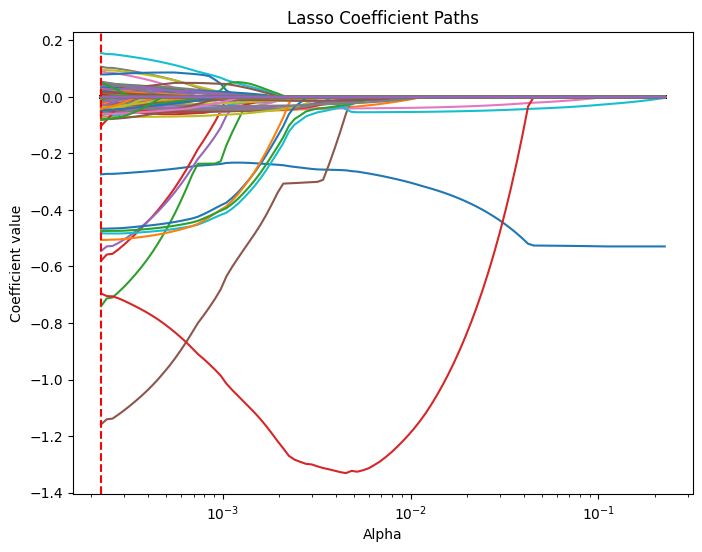

In [14]:
# Compute the lasso path. Note: we use np.log(y_train) because that's what you used in LassoCV.
alphas, coefs, _ = lasso_path(X_train, y_train,
                              alphas=lasso_cv.alphas_,
                              max_iter=100000)
plt.figure(figsize=(8, 6))
# Iterate over each predictor and plot its coefficient path.
for i, col in enumerate(X_train.columns):
    plt.plot(alphas, coefs[i, :], label=col)

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient value')
plt.title('Lasso Coefficient Paths')
#plt.gca().invert_xaxis()  # Lower alphas (weaker regularization) to the right.
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axvline(x=lasso_cv.alpha_, color='red', linestyle='--', label='Best alpha')
#plt.legend()
plt.show()